# Q: look at users coming to your site, predict who is going to convert and come up with ideas to improve conversion rate!

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [18]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5]
converted                2	 [0, 1]


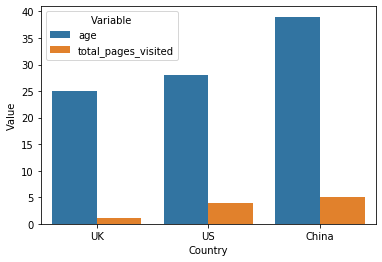

In [62]:
#plot multiple column in seaborn bar chart
df = data.loc[[0,2,3]][['country','age','total_pages_visited']]
tidy = df.melt(id_vars='country').rename(columns=str.title)
sns.barplot(x='Country', y='Value', hue='Variable', data=tidy)

.00000000000.
#Visualization of ages
# grouped = data.loc[[0,2,3]][['country','age','total_pages_visited']].reset_index()
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
# sns.barplot(x='country', y='age', data=grouped, label='Converted 0', 
#              ax=ax[0], color='gray')
# # sns.barplot(x='country', y='total_pages_visited', data=grouped, label='Converted 0', 
# #              ax=ax[0], color='gray')
# # sns.histplot(x='age', hue='converted', data=data, stat='probability', kde=True, ax=ax[0])
# #have to plot seperately to see each converted trend clearly
# ax[0].set_title('Conversion Distribution by Age', fontsize=16)

In [21]:
data[data['age']>100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [4]:
data = data[data['age']<100]
data

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


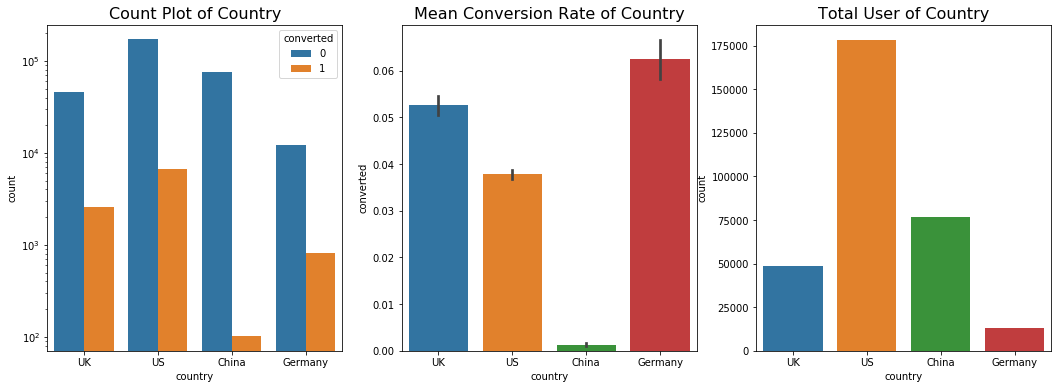

In [77]:
#Visualization of different countries
#After removing outlier, the index will keep same as before, so need to reset index
grouped = data[['country', 'converted']].groupby('country').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=3,  figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='country', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate of Country', fontsize=16)
sns.countplot(x='country', data=data, ax=ax[2])
ax[2].set_title('Total User of Country', fontsize=16)
plt.show()

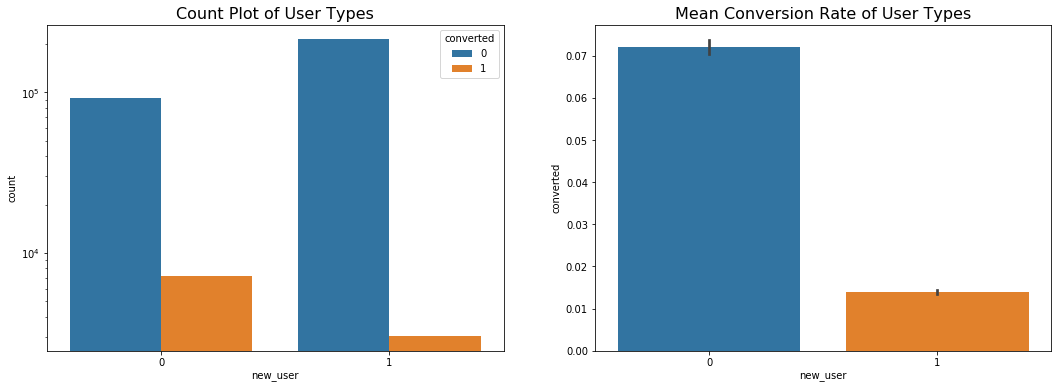

In [7]:
#Visualization of different user types 
grouped = data[['new_user', 'converted']].groupby('new_user').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Types', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='new_user', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate of User Types', fontsize=16)
plt.show()

Old users has higher conversion rate than new users. We should keep touch with them, for example, send promotion email or coupons to old users.

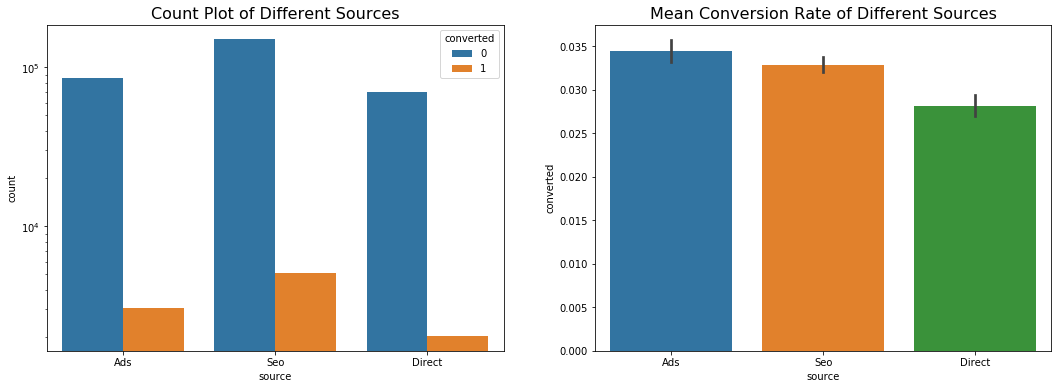

In [14]:
#Visualization of different sources
grouped = data[['source', 'converted']].groupby('source').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2,  figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Different Sources', fontsize=16)
ax[0].set_yscale('log')
sns.barplot(x='source', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate of Different Sources', fontsize=16)
plt.show()

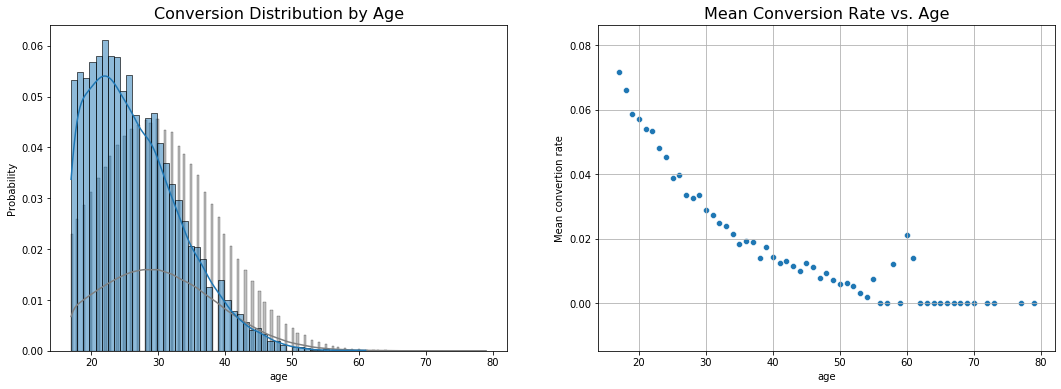

In [79]:
#Visualization of ages
grouped = data[['age', 'converted']].groupby('age').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.histplot(data[data['converted'] == 0]['age'], label='Converted 0', 
             ax=ax[0], stat='probability', kde=True, color='gray')
sns.histplot(data[data['converted'] == 1]['age'], label='Converted 1', 
             ax=ax[0], stat='probability', kde=True)
# sns.histplot(x='age', hue='converted', data=data, stat='probability', kde=True, ax=ax[0])
#have to plot seperately to see each converted trend clearly
ax[0].set_title('Conversion Distribution by Age', fontsize=16)
sns.scatterplot(x=grouped['age'], y=grouped['converted'], ax=ax[1])
ax[1].set_title('Mean Conversion Rate vs. Age', fontsize=16)
ax[1].set_xlabel('age')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

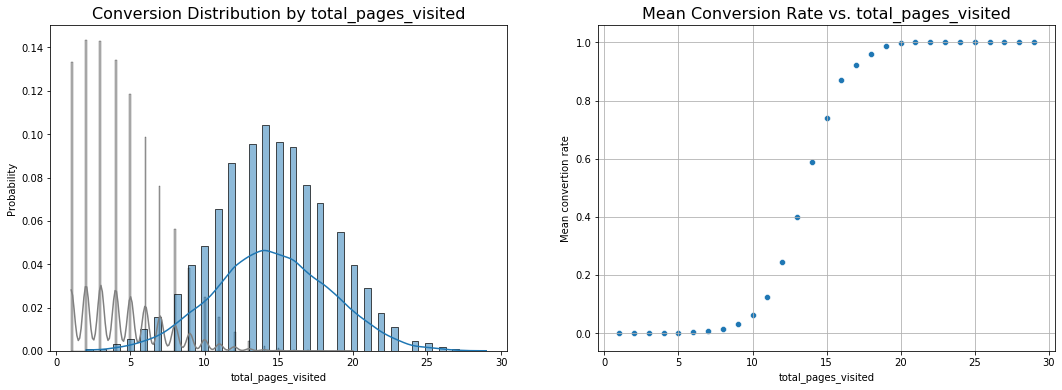

In [3]:
grouped = data[['total_pages_visited', 'converted']].groupby('total_pages_visited').mean().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.histplot(data[data['converted'] == 0]['total_pages_visited'], label='Converted 0', 
             ax=ax[0], stat='probability', kde=True, color='gray')
sns.histplot(data[data['converted'] == 1]['total_pages_visited'], label='Converted 1', 
             ax=ax[0], stat='probability', kde=True)
ax[0].set_title('Conversion Distribution by total_pages_visited', fontsize=16)
sns.scatterplot(x=grouped['total_pages_visited'], y=grouped['converted'], ax=ax[1])
ax[1].set_title('Mean Conversion Rate vs. total_pages_visited', fontsize=16)
ax[1].set_xlabel('total_pages_visited')
ax[1].set_ylabel('Mean convertion rate')
ax[1].grid(True)

In [12]:
import gc
import time
from sklearn.pipeline import make_pipeline #Construct a Pipeline from the given estimators.
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV


In [5]:
X = data.loc[:,('country', 'age', 'new_user', 'source', 'total_pages_visited')]
X = pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [6]:
y = data.converted
y.mean()

0.03225806451612903

In [13]:
classifiers = {'DescisionTree': DecisionTreeClassifier(random_state=1995), 'LogisticRegression': LogisticRegression(random_state=1995), 'RandomForest': RandomForestClassifier(random_state=1995), 'LogisticRegressionCV': LogisticRegressionCV(random_state=1995),}
total_time = []
scores = []
for key, value in classifiers.items():
    print('Building model for {}'.format(key))
    t0 = time.time()
    models = make_pipeline(StandardScaler(),value) #work as seed, Using an int will produce the same results across different calls
    model_scores = cross_val_score(models, X, y, cv=3, n_jobs=-1, scoring='accuracy')  #一会试试cv=5 #n_jobs: Number of jobs to run in parallel. -1 means using all processors.
    t1 = time.time()
    print('Processing time is {}'.format(t1-t0))
    print('Accuracy score is {}'.format(model_scores))
    total_time.append(t1-t0)
    scores.append(model_scores.mean())
    del models
    gc.collect #del model and gc.collect() to keep our memory usage down

Building model for DescisionTree
Processing time is 2.719738006591797
Accuracy score is [0.98364326 0.9838425  0.98407021]
Building model for LogisticRegression
Processing time is 2.760561227798462
Accuracy score is [0.98626186 0.98608159 0.98619545]
Building model for RandomForest
Processing time is 1.4979934692382812
Accuracy score is [0.98402277 0.98428843 0.98401328]
Building model for LogisticRegressionCV
Processing time is 4.305729150772095
Accuracy score is [0.98626186 0.98606262 0.9862334 ]


<function matplotlib.pyplot.show(*args, **kw)>

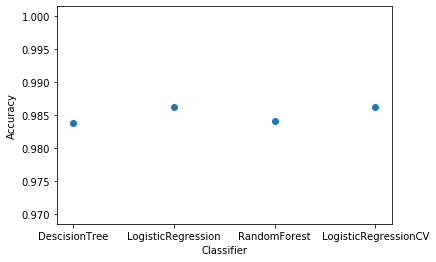

In [24]:
plt.scatter(classifiers.keys(), scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show

In [30]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=1/3)
ytrain.mean(), ytest.mean()
#Why my previous project doesn't need train test split? Because it is predict, it doesn't need to split current dataset to have test dataset to predict

(0.03204459203036053, 0.032685009487666034)

In [22]:
scores.index(max(scores))

3

In [31]:
lrcv = LogisticRegressionCV(random_state=1995,max_iter=1000).fit(Xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [32]:
lrcv

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=1995, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [33]:
lrcv.score(Xtrain,ytrain)

0.9861242884250474

In [34]:
lrcv.score(Xtest,ytest)

0.9862713472485769

In [71]:
from sklearn.metrics import classification_report
ytest_predict = lrcv.predict(Xtest)
print(classification_report(y_true=ytest,y_pred=ytest_predict))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    101955
           1       0.86      0.69      0.77      3445

    accuracy                           0.99    105400
   macro avg       0.93      0.84      0.88    105400
weighted avg       0.99      0.99      0.99    105400



from above, we know for "label=converted", if we use the default cutoff 0.5, we can have a high precision (0.86), but a not very good recall 0.69, which means we classify 32% converted user as non-converted.

since our task is giving Sales team and Marking team some insights, so we don't need to tune the cutoff value now, since that won't affect the model. however, if, for example, if we care more about not losing a valued customer, so incorrectly classifing a converted user as non-converted will pay much, we need to lower down the cut-off probability to be 1, which will increase the recall with the price lower than precision.

since this is an imbalanced classification problem, if we group every record as 'NOT converted', we can still get 96.73 accuracy (1-ytest.mean()). since our LR model produces an accurancy as 98.57% on test dataset, which indicates it is a model which makes sense.

In [40]:

feat_importances = pd.DataFrame({"name":Xtrain.columns,"coef":lrcv.coef_[0]})
feat_importances = feat_importances[['name','coef']]# reorder the columns
feat_importances['importances'] = np.abs( feat_importances['coef'] )
feat_importances.sort_values(by="importances",inplace=True,ascending=False)
feat_importances

,name,coef,importances
3,country_China,-2.583973,2.583973
1,new_user,-1.715990,1.715990
4,country_Germany,1.112154,1.112154
5,country_UK,0.864747,0.864747
2,total_pages_visited,0.760506,0.760506
6,country_US,0.477640,0.477640
8,source_Direct,-0.165263,0.165263
0,age,-0.073495,0.073495
7,source_Ads,0.025276,0.025276
9,source_Seo,0.010554,0.010554


from above model, we can draw below conclusion:

    1.conversion among China users are very bad. from inspection, we know that there are lot of users coming from China, but their conversion rate is very low. Consider China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate. we should consider whether our website has good Chinese translation and satisfy Chinese users' culture requirement.
    2.conversion from Germany is good. but inspection, we know that there isn't a lot of users from German. so it's a huge opportuntity for us to target German users. for example, put more advertisement in German.
    3.old users have better conversion rate. we should keep touch with them, for example, send promotion email or coupons to old users.
    4.age is a negative factor. the older the user is, the less likely he/she will convert. then we should figure out why young people loves the web pages and strengthen it. and also find out why older people doesn't like our web pages, and try to correct it.
    5.total_pages_visited is a positive factor. the longer the user browse our web page, the more likely he/she will convert and buy something. then if we find some user browse a lot and didn't buy anything, we can send email to remaind them.

In [69]:
THRESHOLD = 0.2
preds = np.where(lrcv.predict_proba(Xtest)[:,1] > THRESHOLD, 1, 0)
print(classification_report(y_true=ytest,y_pred=preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    101955
           1       0.68      0.82      0.74      3445

    accuracy                           0.98    105400
   macro avg       0.83      0.91      0.87    105400
weighted avg       0.98      0.98      0.98    105400



In [58]:
lrcv.predict_proba(Xtest)

array([[9.98981247e-01, 1.01875251e-03],
       [9.99950085e-01, 4.99148255e-05],
       [9.99159175e-01, 8.40824849e-04],
       ...,
       [9.99963737e-01, 3.62630049e-05],
       [9.67778118e-01, 3.22218823e-02],
       [9.99963503e-01, 3.64971402e-05]])

In [64]:
ytest[21:40]

195716    1
37242     0
228726    0
288443    0
138226    0
72273     0
204080    0
157480    0
138134    0
139429    1
224944    0
242201    0
283190    0
69111     0
302372    0
246229    0
111859    0
800       0
201462    0
Name: converted, dtype: int64

In [70]:
preds[21:40]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
lrcv.predict_proba(Xtest)[21:40]

array([[1.10287799e-01, 8.89712201e-01],
       [9.99492749e-01, 5.07250800e-04],
       [9.99998092e-01, 1.90839706e-06],
       [9.99753367e-01, 2.46633369e-04],
       [6.00685466e-01, 3.99314534e-01],
       [9.99741246e-01, 2.58754253e-04],
       [9.98222220e-01, 1.77778038e-03],
       [9.99897933e-01, 1.02066973e-04],
       [9.98924929e-01, 1.07507134e-03],
       [7.74426641e-01, 2.25573359e-01],
       [9.95810840e-01, 4.18916049e-03],
       [9.99955648e-01, 4.43520919e-05],
       [9.99077186e-01, 9.22813779e-04],
       [9.99992781e-01, 7.21909802e-06],
       [9.99968694e-01, 3.13060799e-05],
       [9.99951980e-01, 4.80198062e-05],
       [9.95033403e-01, 4.96659665e-03],
       [9.99909307e-01, 9.06926953e-05],
       [9.99982940e-01, 1.70601885e-05]])